# MidProject: Cats and Dogs, Better
Applied Neural Networks <br/>
Dr. Leslie Kerby

Use the Cats and Dogs dataset in Kaggle from Homework 3. Download the dataset and perform necessary data wrangling or preprocessing, just like you did in HW 3 (ie in Parts 1-3).

#**Part 1** <br/>
Create a CNN dog/cat classifier with the following architecture: <br/>
Conv2D: 64 filters, 7x7 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Flatten <br/>
Dense: 128 neurons <br/>
Dropout(15%) <br/>
Dense: 64 neurons <br/>
Dropout(15%) <br/>
Output <br/>
strides=1, padding="same", and activation="relu" for all relevant layers <br/>
Utilize the Nadam optimizer and Early Stopping

What is your accuracy for the validation set and for the test set? Plot several misclassified images.

Save your accuracy and val_accuracy each epoch. You will plot them in Part 4.

In [1]:
#Setting up Kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 798M/814M [00:03<00:00, 217MB/s]
100% 814M/814M [00:03<00:00, 214MB/s]


In [2]:
! mkdir train
! ls

dogs-vs-cats-redux-kernels-edition.zip	kaggle.json  sample_data  train


In [3]:
# unzip the training data all into the newly created training directory
! unzip dogs-vs-cats-redux-kernels-edition.zip -d train

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: train/sample_submission.csv  
  inflating: train/test.zip          
  inflating: train/train.zip         


In [4]:
! unzip train/train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

**Start code here after restarting Colab**

<Figure size 432x288 with 0 Axes>

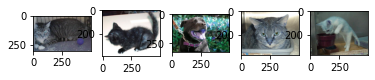

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(15)
tf.random.set_seed(15)

# filenames is a list of all the files we put in the training directory
filenames = os.listdir("train/train/")
# empty list of categories that will be the labels. THIS LIST WILL BE Y
categories = []
# for every file, we split the file name where there is a '.'
# we only keep the first element that was split, which will be
# either 'dog' or 'cat'
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

# Create a dataframe that holds the name (y) of the file and
# the category (x)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# print the first 5 image files from the dataframe and see if they match their title
import cv2
sample_images = []
for i in range(5):
  img = cv2.imread('train/train/' + df['filename'][i], cv2.IMREAD_COLOR)
  sample_images.append(img)
plt.figure()
f, axarr = plt.subplots(1,5)
axarr[0].imshow(sample_images[0])
axarr[1].imshow(sample_images[1])
axarr[2].imshow(sample_images[2])
axarr[3].imshow(sample_images[3])
axarr[4].imshow(sample_images[4])

In [6]:
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (60,60))  # This tuple represents the final image size desired

X = np.ndarray((25000,60,60,3)) # 25000 images, 60x60 pixels, 3 channels (RGB) 
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('train/train/'+image_file)

from sklearn.model_selection import train_test_split

Y = categories
Y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=5000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=5000)

**When restarting colab, run code down to here**

In [ ]:
# Print the first element to see its shape
X[0].shape

(60, 60, 3)

In [ ]:
df.shape

(25000, 2)

In [ ]:
X_train.shape

(15000, 60, 60, 3)

In [ ]:
X_val.shape

(5000, 60, 60, 3)

In [ ]:
# Setting up the CNN
from keras.models import Sequential

model = Sequential([
      keras.layers.Conv2D(filters=64,
      kernel_size=[7,7],
      strides=[1,1],
      padding="same",
      activation="relu",
      input_shape=[60,60,3]),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=128,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.Conv2D(filters=128,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=256,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.Conv2D(filters=256,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Flatten(),

      keras.layers.Dense(128, input_shape=X_train.shape[1:], activation="relu"),

      keras.layers.Dropout(0.15),

      keras.layers.Dense(64, input_shape=X_train.shape[1:], activation="relu"),

      keras.layers.Dropout(0.15),

      keras.layers.Dense(2, activation="softmax")
])

"\nmodel.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))\nmodel.add(keras.layers.MaxPooling2D((2,2)))\n\nmodel.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))\nmodel.add(keras.layers.MaxPooling2D((2,2)))\n\nmodel.add(keras.layers.Flatten())\n\nmodel.add(keras.layers.Dense(128, input_shape = X_train.shape[1:], activation = 'relu'))\n\nmodel.add(keras.layers.Dense(2, activation = 'softmax'))\n"

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
469/469 [==============================] - 41s 59ms/step - loss: 1.0513 - accuracy: 0.5493 - val_loss: 0.6432 - val_accuracy: 0.5984
Epoch 2/50
469/469 [==============================] - 27s 57ms/step - loss: 0.6453 - accuracy: 0.6416 - val_loss: 0.5986 - val_accuracy: 0.6778
Epoch 3/50
469/469 [==============================] - 27s 57ms/step - loss: 0.6167 - accuracy: 0.6645 - val_loss: 0.5821 - val_accuracy: 0.7026
Epoch 4/50
469/469 [==============================] - 27s 57ms/step - loss: 0.6248 - accuracy: 0.6611 - val_loss: 0.5708 - val_accuracy: 0.6996
Epoch 5/50
469/469 [==============================] - 27s 58ms/step - loss: 0.5695 - accuracy: 0.7104 - val_loss: 0.6057 - val_accuracy: 0.6906
Epoch 6/50
469/469 [==============================] - 26s 56ms/step - loss: 0.5692 - accuracy: 0.7106 - val_loss: 0.5914 - val_accuracy: 0.6744
Epoch 7/50
469/469 [==============================] - 26s 55ms/step - loss: 0.5365 - accuracy: 0.7341 - val_loss: 0.5263 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 3s 19ms/step - loss: 0.4803 - accuracy: 0.7982


[0.4803355038166046, 0.7982000112533569]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


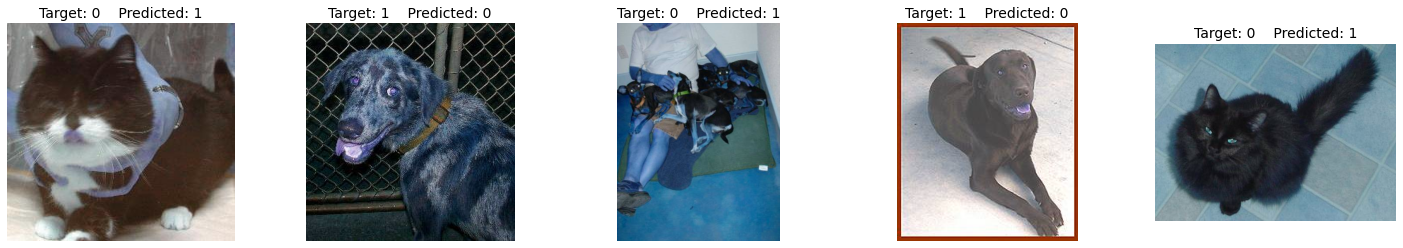

In [ ]:
# misclassified images
predictions = np.argmax(model.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 20000
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

plt.figure(figsize=(25,4))
plt.subplot(1,5,1)
img = cv2.imread('train/train/' + df['filename'][misclassifiedIndexes[0]], cv2.IMREAD_COLOR)
plt.imshow(img)

temp = 1
for index in misclassifiedIndexes:
  plt.subplot(1,5,temp)
  img = cv2.imread('train/train/' + df['filename'][index], cv2.IMREAD_COLOR)
  plt.axis('off')
  plt.title(f'Target: {categories[y_test[index - 20000]]}    Predicted: {categories[predictions[index - 20000]]}', fontsize=14)
  plt.imshow(img)
  temp += 1
  if temp > 5:
    break

**Model Eval** </br>
Validation Accuracy -> 79.72% </br>
Test Accuracy -> 79.82% </br>
The model performed decently and got through 18 epochs before early stopping interrupted it. It got an accuracy of about 80%, which can be improved on. The misclassified images don't seem to be very confusing, so the model is probably just not the best at identifying cats vs dogs. </br>
accuracy and val_accuracy saved in ```history```


#**Part 2** </br>
Add data augmentation. Try different CNN architectures and/or parameters to improve your model. You may also try splitting up the dataset differently (ie more images in training and less in validation and testing sets).

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.

In [ ]:
# CNN with data augmentation and not much else changed
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
#datagen = ImageDataGenerator(rotation_range=40, height_shift_range=0.2, width_shift_range=0.2, horizontal_flip=True)
datagen = ImageDataGenerator(rotation_range=40, horizontal_flip=True)

model = Sequential([
      keras.layers.Conv2D(filters=64,
      kernel_size=[7,7],
      strides=[1,1],
      padding="same",
      activation="relu",
      input_shape=[60,60,3]),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=128,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.Conv2D(filters=128,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=256,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.Conv2D(filters=256,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Flatten(),

      keras.layers.Dense(128, input_shape=X_train.shape[1:], activation="relu"),

      keras.layers.Dropout(0.15),

      keras.layers.Dense(64, input_shape=X_train.shape[1:], activation="relu"),

      keras.layers.Dropout(0.15),

      keras.layers.Dense(2, activation="softmax")
])

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_3 = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                      epochs=50, validation_data=(X_val, y_val), 
                      callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
469/469 [==============================] - 31s 65ms/step - loss: 0.6233 - accuracy: 0.6577 - val_loss: 0.5784 - val_accuracy: 0.6938
Epoch 2/50
469/469 [==============================] - 31s 65ms/step - loss: 0.5910 - accuracy: 0.6863 - val_loss: 0.5808 - val_accuracy: 0.6902
Epoch 3/50
469/469 [==============================] - 30s 65ms/step - loss: 0.5740 - accuracy: 0.7085 - val_loss: 0.5340 - val_accuracy: 0.7370
Epoch 4/50
469/469 [==============================] - 31s 67ms/step - loss: 0.5595 - accuracy: 0.7170 - val_loss: 0.5117 - val_accuracy: 0.7420
Epoch 5/50
469/469 [==============================] - 31s 66ms/step - loss: 0.5428 - accuracy: 0.7305 - val_loss: 0.5051 - val_accuracy: 0.7584
Epoch 6/50
469/469 [==============================] - 31s 66ms/step - loss: 0.5314 - accuracy: 0.7372 - val_loss: 0.5407 - val_accuracy: 0.7340
Epoch 7/50
469/469 [==============================] - 31s 66ms/step - loss: 0.5163 - accuracy: 0.7455 - val_loss: 0.5120 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 3s 22ms/step - loss: 0.4448 - accuracy: 0.7988


[0.4447925388813019, 0.798799991607666]

In [ ]:
# less convolutional layers and dense layers improved performance? accuracy up 4%
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, horizontal_flip=True)

model = Sequential([
      keras.layers.Conv2D(filters=64,
      kernel_size=[7,7],
      strides=[1,1],
      padding="same",
      activation="relu",
      input_shape=[60,60,3]),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=128,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Conv2D(filters=256,
      kernel_size=[3,3],
      strides=1,
      padding="same",
      activation="relu"),

      keras.layers.MaxPool2D((2,2)),

      keras.layers.Flatten(),

      keras.layers.Dense(128, input_shape=X_train.shape[1:], activation="relu"),

      keras.layers.Dropout(0.15),

      keras.layers.Dense(2, activation="softmax")
])

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_4 = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                      epochs=50, validation_data=(X_val, y_val), 
                      callbacks=[keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/50
469/469 [==============================] - 78s 64ms/step - loss: 1.6908 - accuracy: 0.6037 - val_loss: 0.6234 - val_accuracy: 0.6574
Epoch 2/50
469/469 [==============================] - 31s 66ms/step - loss: 0.6472 - accuracy: 0.6477 - val_loss: 0.6016 - val_accuracy: 0.6764
Epoch 3/50
469/469 [==============================] - 27s 58ms/step - loss: 0.5760 - accuracy: 0.7045 - val_loss: 0.5476 - val_accuracy: 0.7268
Epoch 4/50
469/469 [==============================] - 27s 58ms/step - loss: 0.5536 - accuracy: 0.7247 - val_loss: 0.5050 - val_accuracy: 0.7464
Epoch 5/50
469/469 [==============================] - 28s 60ms/step - loss: 0.5449 - accuracy: 0.7241 - val_loss: 0.5989 - val_accuracy: 0.6878
Epoch 6/50
469/469 [==============================] - 28s 59ms/step - loss: 0.5544 - accuracy: 0.7252 - val_loss: 0.4846 - val_accuracy: 0.7716
Epoch 7/50
469/469 [==============================] - 29s 61ms/step - loss: 0.5314 - accuracy: 0.7401 - val_loss: 0.5129 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 3s 19ms/step - loss: 0.3760 - accuracy: 0.8440


[0.37604400515556335, 0.843999981880188]

In [ ]:
# Architecutre probably too simple
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, horizontal_flip=True)

model = Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), kernel_initializer='lecun_normal', activation = 'selu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3, 3), kernel_initializer='lecun_normal', activation = 'selu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, input_shape = X_train.shape[1:], kernel_initializer='lecun_normal', activation = 'selu'))
keras.layers.Dropout(0.20),
model.add(keras.layers.Dense(2, activation = 'softmax'))

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_5 = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                      epochs=50, validation_data=(X_val, y_val), 
                      callbacks=[keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/50
469/469 [==============================] - 30s 56ms/step - loss: 7.1204 - accuracy: 0.6126 - val_loss: 0.5976 - val_accuracy: 0.6816
Epoch 2/50
469/469 [==============================] - 22s 48ms/step - loss: 0.6014 - accuracy: 0.6785 - val_loss: 0.5628 - val_accuracy: 0.7082
Epoch 3/50
469/469 [==============================] - 23s 49ms/step - loss: 0.5744 - accuracy: 0.6990 - val_loss: 0.6745 - val_accuracy: 0.6120
Epoch 4/50
469/469 [==============================] - 24s 52ms/step - loss: 0.5545 - accuracy: 0.7151 - val_loss: 0.5384 - val_accuracy: 0.7256
Epoch 5/50
469/469 [==============================] - 23s 49ms/step - loss: 0.5452 - accuracy: 0.7232 - val_loss: 0.5936 - val_accuracy: 0.6990
Epoch 6/50
469/469 [==============================] - 23s 48ms/step - loss: 34.4040 - accuracy: 0.5805 - val_loss: 0.6494 - val_accuracy: 0.6310
Epoch 7/50
469/469 [==============================] - 23s 48ms/step - loss: 0.7286 - accuracy: 0.5743 - val_loss: 0.7979 - val_accuracy

In [ ]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, horizontal_flip=True)

model = Sequential()
model.add(keras.layers.BatchNormalization(input_shape=[60,60,3]))
model.add(keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1], padding="same", kernel_initializer='lecun_normal', activation='selu', input_shape=[60,60,3]))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3, 3), kernel_initializer='lecun_normal', activation = 'selu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3, 3), kernel_initializer='lecun_normal', activation = 'selu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, input_shape = X_train.shape[1:], kernel_initializer='lecun_normal', activation = 'selu'))
model.add(keras.layers.Dense(128, input_shape = X_train.shape[1:], kernel_initializer='lecun_normal', activation = 'selu'))
keras.layers.Dropout(0.20),
model.add(keras.layers.Dense(2, activation = 'softmax'))

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_6 = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                      epochs=50, validation_data=(X_val, y_val), 
                      callbacks=[keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/50
469/469 [==============================] - 28s 56ms/step - loss: 0.7163 - accuracy: 0.6193 - val_loss: 0.5887 - val_accuracy: 0.6862
Epoch 2/50
469/469 [==============================] - 26s 56ms/step - loss: 0.5678 - accuracy: 0.7062 - val_loss: 0.5206 - val_accuracy: 0.7392
Epoch 3/50
469/469 [==============================] - 28s 60ms/step - loss: 0.5302 - accuracy: 0.7353 - val_loss: 0.5066 - val_accuracy: 0.7482
Epoch 4/50
469/469 [==============================] - 24s 52ms/step - loss: 0.5122 - accuracy: 0.7483 - val_loss: 0.5401 - val_accuracy: 0.7282
Epoch 5/50
469/469 [==============================] - 24s 52ms/step - loss: 0.4927 - accuracy: 0.7558 - val_loss: 0.4788 - val_accuracy: 0.7772
Epoch 6/50
469/469 [==============================] - 26s 56ms/step - loss: 0.4688 - accuracy: 0.7753 - val_loss: 0.4393 - val_accuracy: 0.7942
Epoch 7/50
469/469 [==============================] - 25s 53ms/step - loss: 0.4564 - accuracy: 0.7812 - val_loss: 0.4406 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 2s 12ms/step - loss: 0.4124 - accuracy: 0.8106


[0.41240155696868896, 0.8105999827384949]

#**Part 3**</br>
Use transfer learning. Train on at least three different expert CNNs: Xception, a variant of ResNet, and a variant of EfficientNet. See [here](https://keras.io/api/applications/) for a full list of models available in Keras. Please note that many of these have special requirements (for image size etc). You decide (or experiment with) how to best transfer learn on these expert CNNs.

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.



In [ ]:
import tensorflow as tf
from tensorflow import keras

# Proprocess for resnet
tf.keras.applications.resnet.preprocess_input(X_train)
tf.keras.applications.resnet.preprocess_input(X_val)
tf.keras.applications.resnet.preprocess_input(X_test)

In [ ]:
base_model = keras.applications.ResNet50(weights="imagenet",
                                    include_top=False,
                                    input_shape=(60,60,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(2, activation='softmax')(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
  layer.trainable = True

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hisotry_ResNet = model.fit(X_train, y_train, batch_size=32, 
                           epochs=50, 
                           validation_data=(X_val, y_val), 
                           callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
469/469 [==============================] - 161s 273ms/step - loss: 0.7033 - accuracy: 0.7503 - val_loss: 0.8114 - val_accuracy: 0.8002
Epoch 2/50
469/469 [==============================] - 124s 265ms/step - loss: 0.3725 - accuracy: 0.8565 - val_loss: 0.3251 - val_accuracy: 0.8560
Epoch 3/50
469/469 [==============================] - 124s 264ms/step - loss: 0.1700 - accuracy: 0.9336 - val_loss: 0.4697 - val_accuracy: 0.8108
Epoch 5/50
469/469 [==============================] - 124s 265ms/step - loss: 0.1421 - accuracy: 0.9455 - val_loss: 0.3143 - val_accuracy: 0.8772
Epoch 6/50
469/469 [==============================] - 125s 266ms/step - loss: 0.1405 - accuracy: 0.9462 - val_loss: 0.3856 - val_accuracy: 0.8684
Epoch 7/50
469/469 [==============================] - 124s 265ms/step - loss: 0.1137 - accuracy: 0.9565 - val_loss: 0.4066 - val_accuracy: 0.8466
Epoch 8/50
469/469 [==============================] - 125s 266ms/step - loss: 0.0977 - accuracy: 0.9631 - val_loss: 0.3481 -

In [ ]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 7s 43ms/step - loss: 0.5354 - accuracy: 0.8234


[0.5353866815567017, 0.8234000205993652]

In [ ]:
hisotry_ResNet_2 = model.fit(X_train, y_train, batch_size=32, 
                           epochs=50, 
                           validation_data=(X_val, y_val), 
                           callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
469/469 [==============================] - 149s 271ms/step - loss: 0.5592 - accuracy: 0.7869 - val_loss: 0.4291 - val_accuracy: 0.8132
Epoch 2/50
469/469 [==============================] - 129s 276ms/step - loss: 0.4188 - accuracy: 0.8319 - val_loss: 0.9049 - val_accuracy: 0.5788
Epoch 3/50
469/469 [==============================] - 125s 267ms/step - loss: 0.3591 - accuracy: 0.8502 - val_loss: 0.3600 - val_accuracy: 0.8436
Epoch 4/50
469/469 [==============================] - 129s 275ms/step - loss: 0.2586 - accuracy: 0.8926 - val_loss: 0.3514 - val_accuracy: 0.8744
Epoch 5/50
469/469 [==============================] - 125s 267ms/step - loss: 0.2052 - accuracy: 0.9169 - val_loss: 0.8829 - val_accuracy: 0.7890
Epoch 6/50
469/469 [==============================] - 125s 266ms/step - loss: 0.1608 - accuracy: 0.9351 - val_loss: 0.3707 - val_accuracy: 0.8720
Epoch 7/50
469/469 [==============================] - 124s 265ms/step - loss: 0.1172 - accuracy: 0.9552 - val_loss: 0.3430 -

In [ ]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 7s 42ms/step - loss: 1.4087 - accuracy: 0.6546


[1.4087474346160889, 0.6546000242233276]

In [ ]:
import tensorflow as tf
from tensorflow import keras

# proprocess for xception
tf.keras.applications.xception.preprocess_input(X_train)
tf.keras.applications.xception.preprocess_input(X_val)
tf.keras.applications.xception.preprocess_input(X_test)

X_train_resize = tf.image.resize(X_train, [71,71])
X_val_resize = tf.image.resize(X_val, [71,71])
X_test_resize = tf.image.resize(X_test, [71,71])

In [ ]:
X_train_resize.shape

TensorShape([15000, 71, 71, 3])

In [ ]:
base_model = keras.applications.Xception(weights="imagenet",
                                    include_top=False,
                                    input_shape=(71,71,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(2, activation='softmax')(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
  layer.trainable = True

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

history_xception = model.fit(datagen.flow(X_train_resize, y_train, batch_size=32), 
                           epochs=50, 
                           validation_data=(X_val_resize, y_val), 
                           callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
469/469 [==============================] - 140s 261ms/step - loss: 0.5739 - accuracy: 0.6929 - val_loss: 24.2148 - val_accuracy: 0.5012
Epoch 2/50
469/469 [==============================] - 118s 253ms/step - loss: 0.3962 - accuracy: 0.8243 - val_loss: 28535.9688 - val_accuracy: 0.5012
Epoch 3/50
469/469 [==============================] - 118s 252ms/step - loss: 0.3274 - accuracy: 0.8572 - val_loss: 2636.2166 - val_accuracy: 0.4988
Epoch 4/50
469/469 [==============================] - 118s 252ms/step - loss: 0.2927 - accuracy: 0.8760 - val_loss: 3631.5525 - val_accuracy: 0.4988
Epoch 5/50
469/469 [==============================] - 118s 252ms/step - loss: 0.2591 - accuracy: 0.8913 - val_loss: 1360.4622 - val_accuracy: 0.4988
Epoch 6/50
469/469 [==============================] - 118s 252ms/step - loss: 0.2381 - accuracy: 0.9014 - val_loss: 71795.2031 - val_accuracy: 0.5012


In [ ]:
model.evaluate(X_test_resize, y_test)

157/157 [==============================] - 8s 51ms/step - loss: 72169.4062 - accuracy: 0.4986


[72169.40625, 0.4986000061035156]

In [45]:
# RAM issues
! nvidia-smi

Tue Mar 29 01:44:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |   8725MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [46]:
! kill 460.32.03

/bin/bash: line 0: kill: 460.32.03: arguments must be process or job IDs


In [10]:
import tensorflow as tf
from tensorflow import keras

# proprocess for EfficientNet
# Had to make sizes very small, probably too small
X_train = tf.image.resize(X_train[:3000], [224,224])
X_val = tf.image.resize(X_val[:1000], [224,224])
X_test = tf.image.resize(X_test[:1000], [224,224])

X_train.shape

TensorShape([3000, 224, 224, 3])

In [15]:
y_train = y_train[:3000]
y_val = y_val[:1000]
y_test = y_test[:1000]

In [12]:
base_model = keras.applications.EfficientNetB0(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg) 
output = keras.layers.Dense(2, activation="softmax")(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [17]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history_Efficient = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                           epochs=50, 
                           validation_data=(X_val, y_val), 
                           callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
94/94 [==============================] - 109s 690ms/step - loss: 0.2665 - accuracy: 0.8847 - val_loss: 0.2246 - val_accuracy: 0.9180
Epoch 2/50
94/94 [==============================] - 61s 645ms/step - loss: 0.1395 - accuracy: 0.9433 - val_loss: 0.3757 - val_accuracy: 0.8840
Epoch 3/50
94/94 [==============================] - 60s 637ms/step - loss: 0.1155 - accuracy: 0.9550 - val_loss: 0.6377 - val_accuracy: 0.8520
Epoch 4/50
94/94 [==============================] - 60s 638ms/step - loss: 0.0950 - accuracy: 0.9637 - val_loss: 0.2596 - val_accuracy: 0.9060
Epoch 5/50
94/94 [==============================] - 60s 636ms/step - loss: 0.0832 - accuracy: 0.9720 - val_loss: 0.2071 - val_accuracy: 0.9350
Epoch 6/50
94/94 [==============================] - 60s 639ms/step - loss: 0.0616 - accuracy: 0.9770 - val_loss: 0.2217 - val_accuracy: 0.9380
Epoch 7/50
94/94 [==============================] - 60s 635ms/step - loss: 0.0537 - accuracy: 0.9787 - val_loss: 0.4050 - val_accuracy: 0.916

In [19]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 5s 139ms/step - loss: 0.2301 - accuracy: 0.9490


[0.23010998964309692, 0.9490000009536743]

In [23]:
y_test.shape

(1000,)

In [24]:
X_test.shape

TensorShape([1000, 224, 224, 3])

[20004, 20013, 20018, 20020, 20027, 20029, 20048, 20051, 20093, 20098, 20115, 20192, 20210, 20215, 20260, 20266, 20347, 20348, 20360, 20378, 20385, 20407, 20427, 20450, 20465, 20484, 20488, 20489, 20494, 20496, 20513, 20544, 20549, 20560, 20589, 20592, 20617, 20632, 20652, 20662, 20713, 20746, 20757, 20765, 20788, 20796, 20816, 20822, 20843, 20872, 20889]
51
25000
1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


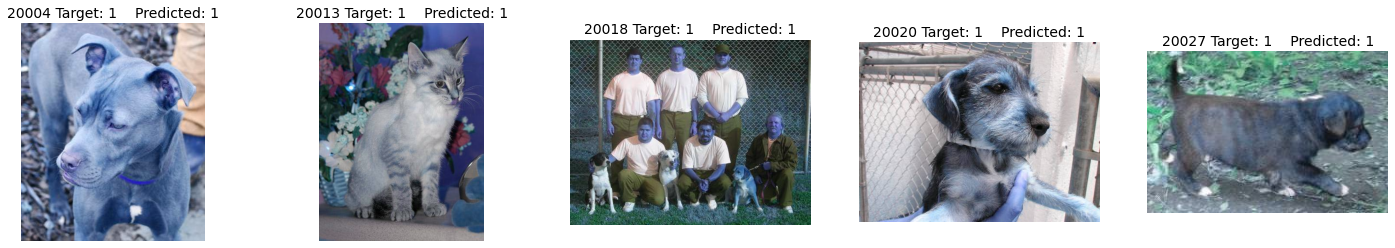

In [44]:
# The data originally was train   -> 0     - 15000
#                         test    -> 20000 - 25000
#                         val     -> 15000 - 20000     
# Then spilt into
#                         train   -> 0     - 3000
#                         test    -> 20000 - 21000
#                         val     -> 15000 - 16000                    

# not getting this right for some reason...
predictions = np.argmax(model.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 20000
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

print(misclassifiedIndexes)
print(len(misclassifiedIndexes))
print(len(categories))
print(len(predictions))

plt.figure(figsize=(25,4))
plt.subplot(1,5,1)
img = cv2.imread('train/train/' + df['filename'][misclassifiedIndexes[0]], cv2.IMREAD_COLOR)
plt.imshow(img)

temp = 1
for index in misclassifiedIndexes:
  plt.subplot(1,5,temp)
  img = cv2.imread('train/train/' + df['filename'][index], cv2.IMREAD_COLOR)
  plt.axis('off')
  plt.title(f'{index} Target: {categories[y_test[index - 20000]]}    Predicted: {categories[predictions[index - 20000]]}', fontsize=14)
  plt.imshow(img)
  temp += 1
  if temp > 5:
    break

**Part 4**</br>
Plot the training and validation accuracy per epoch for your (best) model from each part. Discuss any differences. Which model(s) tend to be overfit? Which model(s) are not? Why?

Note: If you have a model B that is only a little better than a model A with respect to validation/testing accuracy, but model B is not overfit and model A is, that is actually a huge improvement. 

#Model Evaluations
Each model got better in each step, with the first model being the worst functioning while the EfficientNet model in part 4 being the best. </br></br>
A common trend between all of the models was that they had ups and downs when it came to accuracy. Instead of gradually becoming better over time like all of the previous assignments, these convolutional models jumped around almost universally. This might just be part of the learning process for the models and is normal, but it makes the model seem overall more unstanble and possibly overfit. </br> </br>
**Part 1** </br>
This model was pretty unstable during the first 8 epochs, but then quickly flattened out afterward and looked stable. Since the model only increased in accuracy afterwards and there were no strange trends, I think it wasn't overfit once it finished fitting. This may be because the architecture itself wasn't very complex and the model didn't train for long enough to become super specific to the training set. It also reached it's maximum validation accuracy at the *end* of its training.</br>
**Part 2** </br>
This model started off unstable just like the previous model but trained for many more epochs, achieving a higher accuracy level. There were more bumps along the process of training for this model all the way to the end, however the average accuracy only increased. The architecutre was also *simpler* than the pervious model, yet it performed better. The model also utilized data augmentation to help stop becoming overfit. For all these reasons, I believe the mdoel didn't become overfit and topped off with an accuracy of ~84%.
**Part 3** </br>
The final model from part 3 that performed the best was the EfficientNetB0 model. It reached high 90's in accuracy almost immediately but also had more problems than the other previous models. Because of memory constraints, I kept decreasing the size of the training, testing, and validation sets until sizes of only 3000, 1000, and 1000 were used respectively. Data augmentation was used to help with overfitting, but I think that with a sample size so small, it's very difficult to create a model that isn't too specified on its given training set. The model was only unstable with its validation loss while its validation accuracy was stable. It doesn't appear to be too overfit from the given data, but I believe it would not hold up as well when used with other data sets due to its small sample size. 


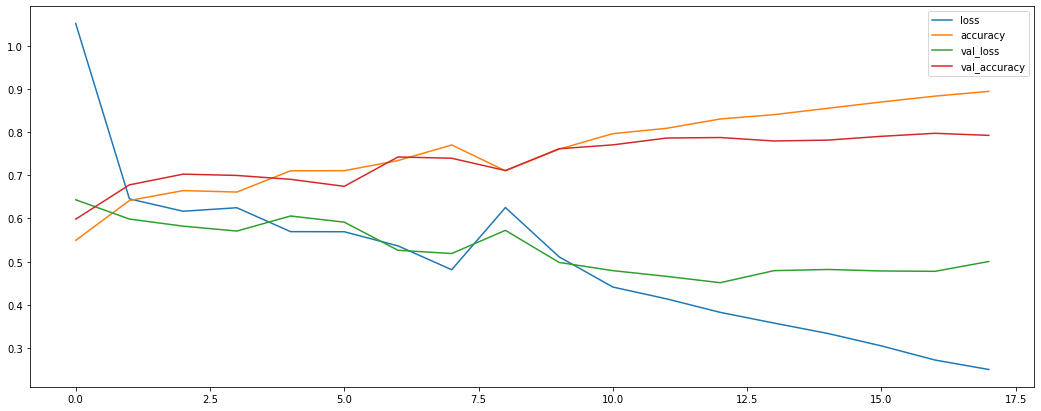

In [ ]:
# Part 1 Model
# Evaluation -> loss: 0.4803 - accuracy: 0.7982
pd.DataFrame(history.history).plot(figsize=(18,7))

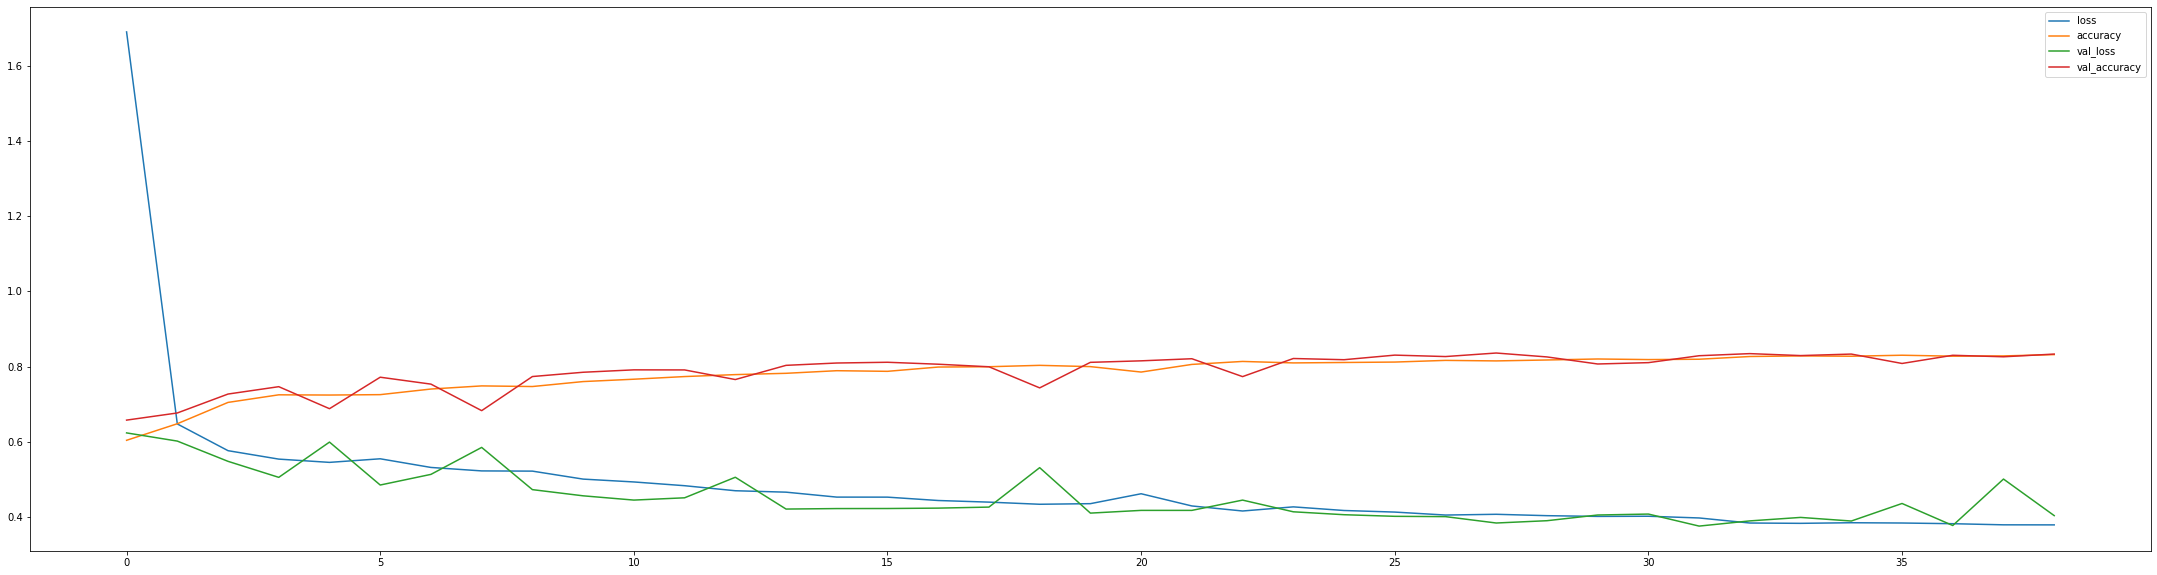

In [ ]:
# Part 2 Best Model
# Evaluation -> loss: 0.3760 - accuracy: 0.8440
pd.DataFrame(history_4.history).plot(figsize=(38,10))

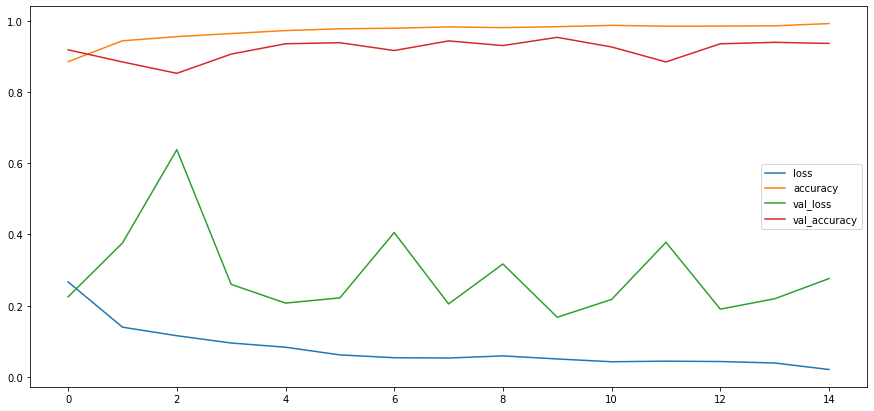

In [20]:
# Part 3 EfficientNet
# Evaluation -> loss: 0.2301 - accuracy: 0.9490
pd.DataFrame(history_Efficient.history).plot(figsize=(15,7))